# SOA Oxidation Chamber Experiment

In this exercise, we will learn how to analyze SOA yield experimental data.

### Step 0: load needed packages and define useful functions

In [4]:
import os, sys, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

In [5]:
#Define function for fitting yield data
#This form uses the VBS paramaterization. We are assuming that there is no pre-existing organic mass
def Yield_Param(M, a1, a2, a3, a4):
    C1 = 0.1
    C2 = 1
    C3 = 10
    C4 = 100
    
    Y = (a1/(1+(C1/M))) + (a2/(1+(C2/M))) + (a3/(1+(C3/M))) + (a4/(1+(C4/M)))
    return Y

Step 1: Load the data and convert to np 1-D arrays to facilitate analysis

In [6]:
file = ("Yield_Data.xlsx")

In [7]:
df_Yield = pd.read_excel(file)

In [8]:
df_Yield

,dM_Exp1,dHc_Exp1,dM_Exp2,dHc_Exp2,dM_Exp3,dHc_Exp3
0,0.001918,0.434805,0.012086,9.457555,0.022868,7.721191
1,0.041199,7.460096,0.028671,21.376762,0.105661,16.646528
2,0.086466,17.738652,0.209603,29.961076,0.261878,22.447220
3,0.287062,23.322951,0.631771,36.424149,0.481239,30.955684
4,0.491515,28.039283,1.366232,42.906091,0.893569,37.784015
5,0.929924,34.100760,2.033022,55.177412,1.473246,43.335741
6,1.615402,38.826076,3.042701,62.919211,2.266494,52.107909
7,2.277436,43.711458,4.044547,70.079143,3.066507,57.637518
8,3.174805,50.017500,5.062492,76.134242,3.862286,63.868068
9,3.931403,52.503792,6.097617,81.243791,4.671788,68.383872


In [117]:
dM_Exp1 = df_Yield["dM_Exp1"].to_numpy()
dM_Exp2 = df_Yield["dM_Exp2"].to_numpy()
dM_Exp3 = df_Yield["dM_Exp3"].to_numpy()


total_dM = (dM_Exp1 + dM_Exp2 + dM_Exp3) / 3

In [118]:
dHc_Exp1 = df_Yield["dHc_Exp1"].to_numpy()
dHc_Exp2 = df_Yield["dHc_Exp2"].to_numpy()
dHc_Exp3 = df_Yield["dHc_Exp3"].to_numpy()

total_dHc = (dHc_Exp1 + dHc_Exp2 + dHc_Exp3) / 3

Step 2:  Calculate Yield and Plot data.
Start with data from one experiment. 

In [119]:
Y_Exp1 = dM_Exp1 / dHc_Exp1
Y_Exp2 = dM_Exp2 / dHc_Exp2
Y_Exp3 = dM_Exp3 / dHc_Exp3
Y_total = total_dM / total_dHc

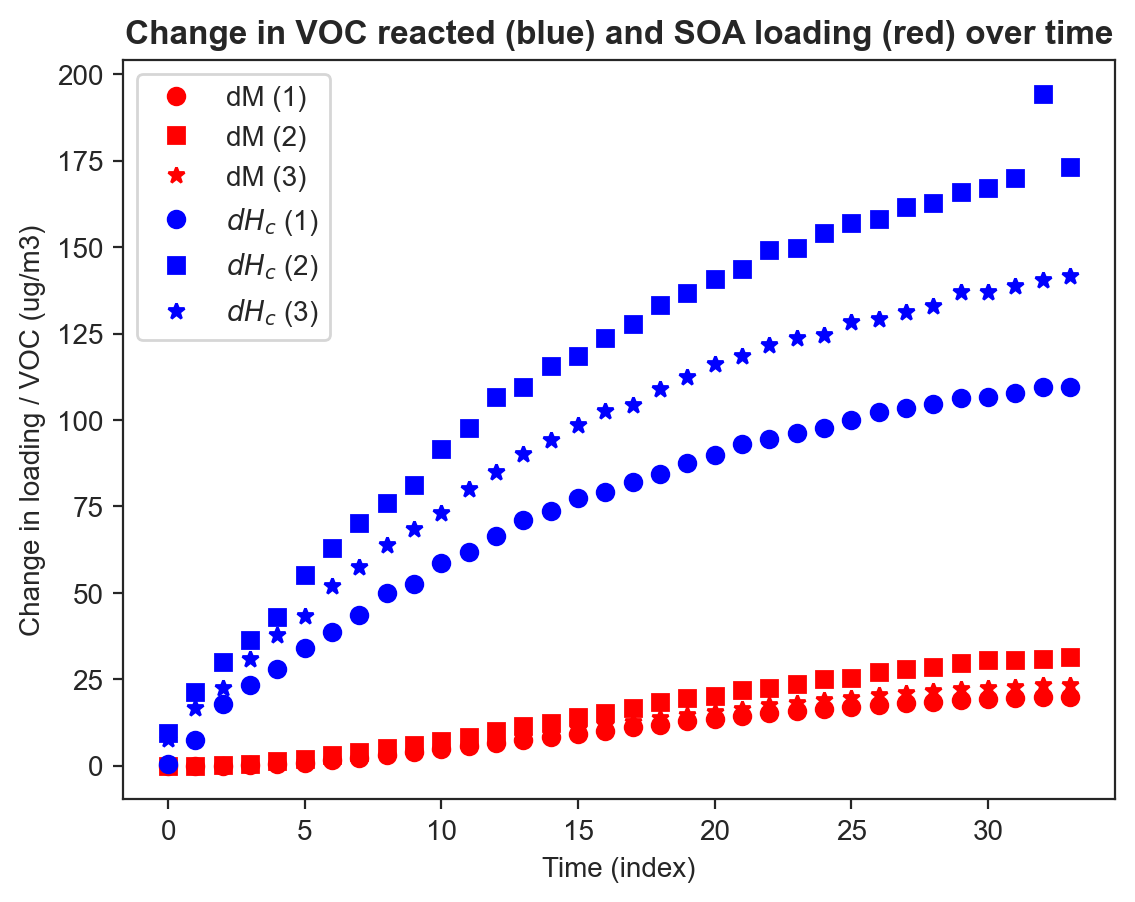

In [120]:
#Traditionally, we plot Yield vs M
plt.plot(df_Yield.index, dM_Exp1, 'or', label = 'dM (1)')
plt.plot(df_Yield.index, dM_Exp2, 'sr', label = 'dM (2)')
plt.plot(df_Yield.index, dM_Exp3, '*r', label = 'dM (3)')

plt.plot(df_Yield.index, dHc_Exp1, 'ob', label = '$dH_c$ (1)')
plt.plot(df_Yield.index, dHc_Exp2, 'sb', label = '$dH_c$ (2)')
plt.plot(df_Yield.index, dHc_Exp3, '*b', label = '$dH_c$ (3)')

plt.xlabel("Time (index)")
plt.ylabel("Change in loading / VOC (ug/m3)")
plt.title('Change in VOC reacted (blue) and SOA loading (red) over time', weight = 'bold')
plt.legend(loc = 'upper left')

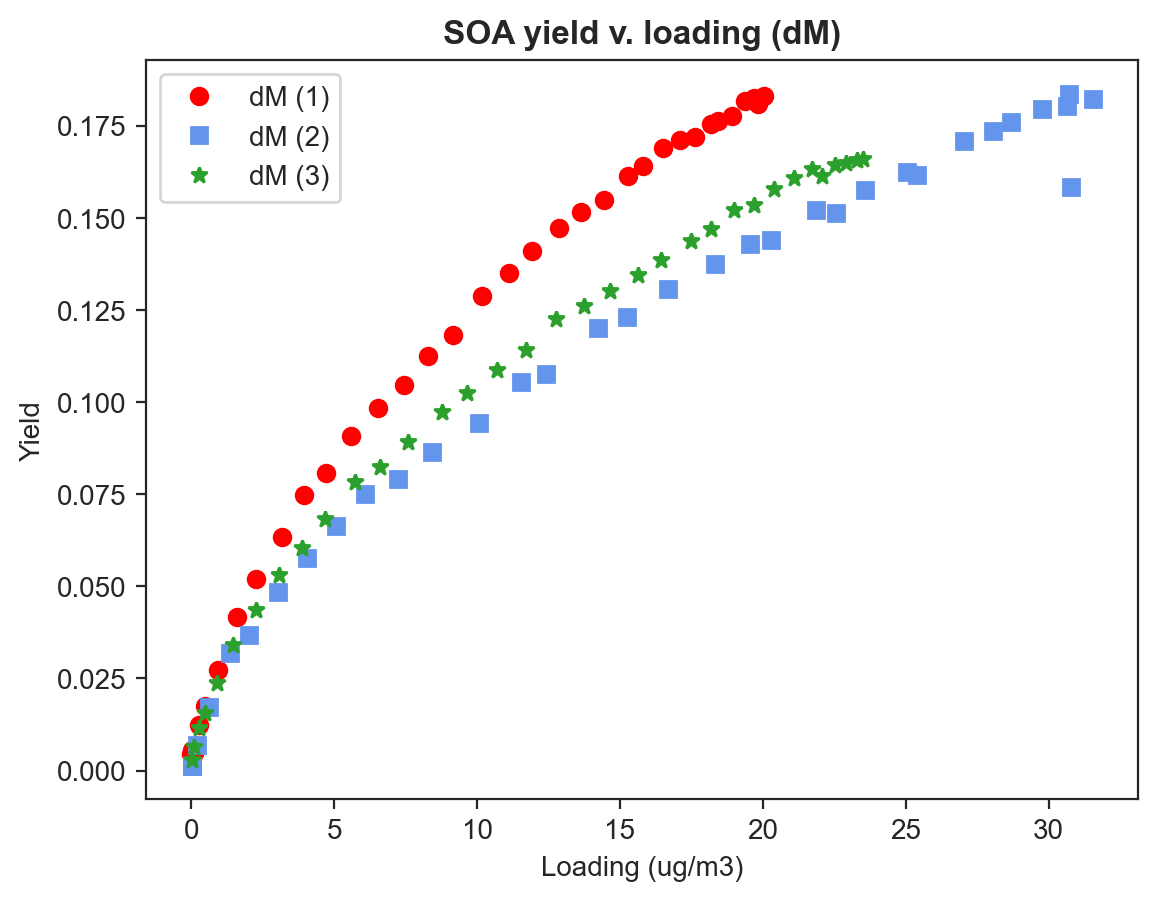

In [121]:
#Traditionally, we plot Yield vs M
plt.plot(dM_Exp1, Y_Exp1, 'or', label = 'dM (1)')
plt.plot(dM_Exp2, Y_Exp2, 's', color = 'cornflowerblue',  label = 'dM (2)')
plt.plot(dM_Exp3, Y_Exp3, '*', color = 'tab:green', label = 'dM (3)')

# plt.plot(dHc_Exp1, Y_Exp1, 'or', label = 'dHc', color = 'tab:blue')

plt.xlabel("Loading (ug/m3)")
plt.ylabel("Yield")
plt.title("SOA yield v. loading (dM)", weight = 'bold')
plt.legend(loc = 'upper left')

Step 3: Fit data and plot data and fit results

In [160]:
initial_guess = [.001, .01, .1, .3]

In [161]:
#We will constrain the alpha value solutions to 0 - 1. These are the values that have physical meaning.
params_1, cov_1 = curve_fit(Yield_Param, dM_Exp1, Y_Exp1, p0 = initial_guess, bounds = (0, [1, 1, 1, 1]))
params_2, cov_2 = curve_fit(Yield_Param, dM_Exp2, Y_Exp2, p0 = initial_guess, bounds = (0, [1, 1, 1, 1]))
params_3, cov_3 = curve_fit(Yield_Param, dM_Exp3, Y_Exp3, p0 = initial_guess, bounds = (0, [1, 1, 1, 1]))
params_t, cov_t = curve_fit(Yield_Param, total_dM, Y_total, p0 = initial_guess, bounds = (0, [1, 1, 1, 1]))

In [162]:
Y_fit_Exp1 = Yield_Param(dM_Exp1, params_1[0], params_1[1], params_1[2], params_1[3])
Y_fit_Exp2 = Yield_Param(dM_Exp2, params_2[0], params_2[1], params_2[2], params_2[3])
Y_fit_Exp3 = Yield_Param(dM_Exp3, params_3[0], params_3[1], params_3[2], params_3[3])
Y_fit_total = Yield_Param(total_dM, params_t[0], params_t[1], params_t[2], params_t[3])

Text(0.5, 0.97, 'SOA Yield v. dM')

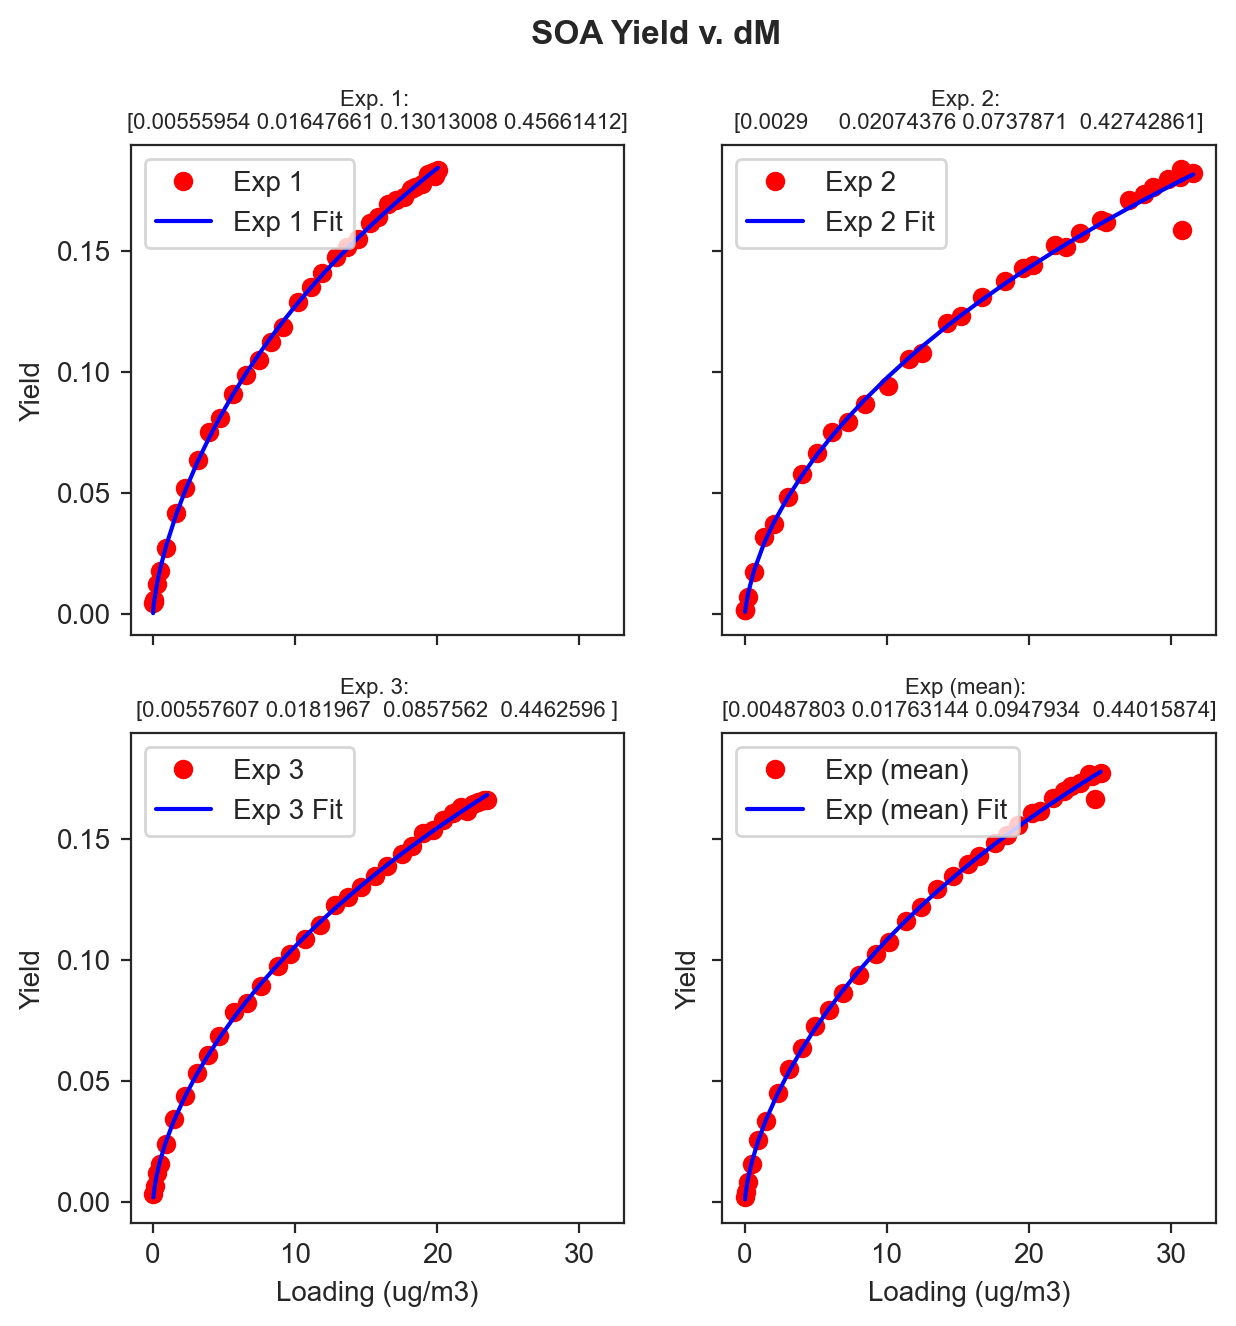

In [163]:
fig, ax = plt.subplots(2,2, sharex = True, sharey = True, figsize = (7,7))

ax1 = ax[0,0]

ax1.plot(dM_Exp1, Y_Exp1, 'or', label='Exp 1')
ax1.plot(dM_Exp1, Y_fit_Exp1, '-b', label = 'Exp 1 Fit')
# ax.xlabel("Loading (ug/m3)")
ax1.set_ylabel("Yield")
ax1.legend(loc= 'upper left')
ax1.set_title(f'Exp. 1: \n{params_1}', fontsize = 8)

ax2 = ax[0,1]
ax2.plot(dM_Exp2, Y_Exp2, 'or', label='Exp 2')
ax2.plot(dM_Exp2, Y_fit_Exp2, '-b', label = 'Exp 2 Fit')
ax2.legend(loc= 'upper left')
ax2.set_title(f'Exp. 2: \n{params_2}', fontsize = 8)

ax3 = ax[1, 0]
ax3.plot(dM_Exp3, Y_Exp3, 'or', label='Exp 3')
ax3.plot(dM_Exp3, Y_fit_Exp3, '-b', label = 'Exp 3 Fit')
ax3.legend(loc= 'upper left')
ax3.set_title(f'Exp. 3: \n{params_3}', fontsize = 8)
ax3.set_ylabel("Yield")
ax3.set_xlabel("Loading (ug/m3)")

ax4 = ax[1, 1]
ax4.plot(total_dM, Y_total, 'or', label='Exp (mean)')
ax4.plot(total_dM, Y_fit_total, '-b', label = 'Exp (mean) Fit')
ax4.legend(loc= 'upper left')
ax4.set_title(f'Exp (mean): \n{params_t}', fontsize = 8)
ax4.set_ylabel("Yield")
ax4.set_xlabel("Loading (ug/m3)")
fig.suptitle('SOA Yield v. dM', weight = 'bold', y = 0.97)

Step 5: Try different initial guesses for the alpha values. Are the fitting coefficients sensitive to the initial guess? 

Step 6: Fit other experimental data and compare the alpha values extracted. Combine all experimental data and fit. How do the values of alpha change?  What does this mean about the physical interpretation of the alpha values? 